import library

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Explore data

In [2]:
train = pd.read_csv("data/train.csv")
store = pd.read_csv("data/store.csv")
#info of train df
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


C:\Users\V\AppData\Local\Temp\ipykernel_19404\4195452424.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("data/train.csv")


In [3]:
print(train.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [4]:
print(train.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


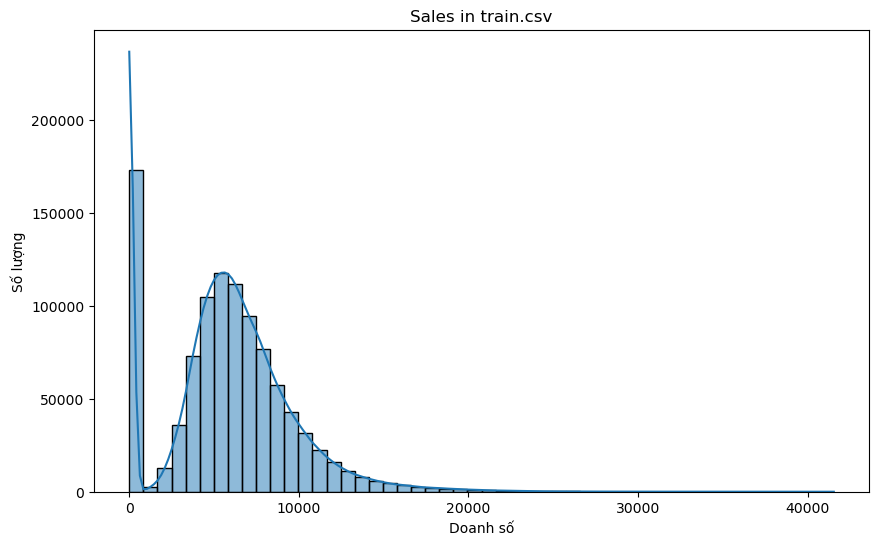

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(train["Sales"], bins=50, kde=True)
plt.title("Sales in train.csv")
plt.xlabel("Doanh số")
plt.ylabel("Số lượng")
plt.show()

In [6]:
#Checking for inconsistance in Sales and Open
print(len(train[train["Sales"] == 0]))
print(len(train[train["Open"] == 0]))
print(len(train[(train["Open"] == 0) & (train["Sales"] > 0)]))

172871
172817
0


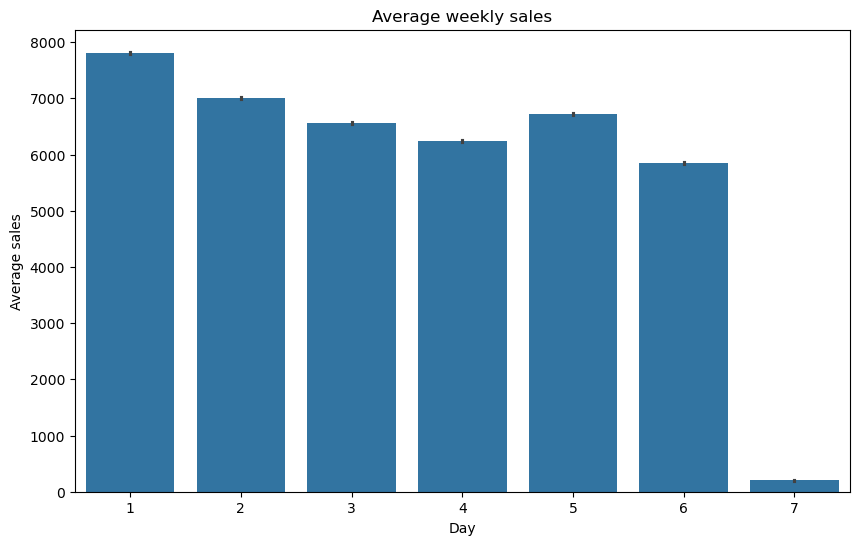

In [7]:
#Doanh số trung bình trong tuần (2->cn)
plt.figure(figsize=(10, 6))
sns.barplot(x="DayOfWeek", y="Sales", data=train)
plt.title("Average weekly sales")
plt.xlabel("Day")
plt.ylabel("Average sales")
plt.show()

In [8]:
print(store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [9]:
print("head\n",store.head())

head
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Ja

In [10]:
print("sum of null\n",store.isnull().sum())

sum of null
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


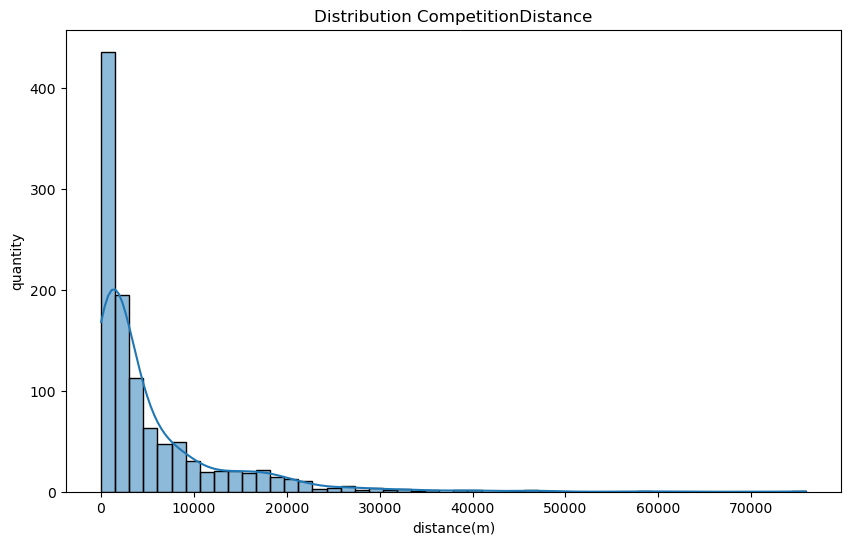

In [11]:
#Phân phối của CompetitionDistance
plt.figure(figsize=(10, 6))
sns.histplot(store["CompetitionDistance"].dropna(), bins=50, kde=True)
plt.title("Distribution CompetitionDistance")
plt.xlabel("distance(m)")
plt.ylabel("quantity")
plt.show()

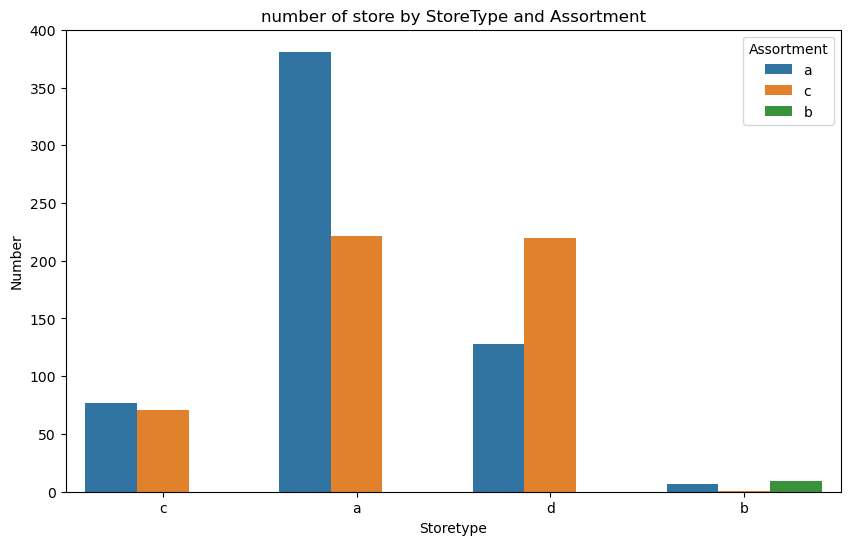

In [12]:
#Đếm StoreType và Assortment(loại sp)
plt.figure(figsize=(10, 6))
sns.countplot(x="StoreType", hue="Assortment", data=store)
plt.title("number of store by StoreType and Assortment")
plt.xlabel("Storetype")
plt.ylabel("Number")
plt.show()

In [13]:
#Kiểm tra giá trị bất thường trong CompetitionDistance
print("\nCompetition Distance max:")
print(store["CompetitionDistance"].max())
print("Competition Distance min:")
print(store["CompetitionDistance"].min())
print("n/a:")
print(sum(store['CompetitionDistance'].isna()))


Competition Distance max:
75860.0
Competition Distance min:
20.0
n/a:
3


Data Cleaning & Processing

In [14]:
#Clean data
train_cleaned = train[train["Sales"] > 0]  #Remove Sales = 0
store["CompetitionDistance"].fillna(999999, inplace=True)

store_cleaned = store.copy()
store_cleaned["CompetitionDistance"].fillna(999999, inplace=True)  #filled NA in CompetitionDistance

#merge data
preprocessed_data = pd.merge(train_cleaned, store_cleaned, on="Store")
preprocessed_data.to_csv("data/preprocessed_data.csv", index=False)

C:\Users\V\AppData\Local\Temp\ipykernel_19404\590601877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store["CompetitionDistance"].fillna(999999, inplace=True)
C:\Users\V\AppData\Local\Temp\ipykernel_19404\590601877.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [15]:
#Encode categorical variables
preprocessed_data = pd.read_csv("data/preprocessed_data.csv", low_memory=False)
preprocessed_data["StoreType"] = LabelEncoder().fit_transform(preprocessed_data["StoreType"])
preprocessed_data["Assortment"] = LabelEncoder().fit_transform(preprocessed_data["Assortment"])
preprocessed_data["StateHoliday"] = preprocessed_data["StateHoliday"].map({"0": 0, "a": 1, "b": 2, "c": 3})

#preprocessed_data.to_csv("data/preprocessed_data.csv", index=False)

In [16]:
# Split data
_x = preprocessed_data.drop(["Sales", "Date", "PromoInterval"], axis=1)
_y = preprocessed_data["Sales"]
x_train, x_val, y_train, y_val = train_test_split(_x, _y, test_size=0.2, random_state=50)

In [17]:
#Saveprocessed data
preprocessed_data.to_csv("data/preprocessed_data.csv", index=False)

Training Model

Using XGboosting.

Reference: 
https://github.com/nikhilpatil44/rossmann-store-sales-prediction/blob/main/rossmann-store-sale.ipynb

https://www.kaggle.com/datasets/pratyushakar/rossmann-store-sales/data

https://www.kaggle.com/competitions/rossmann-store-sales


In [18]:
#Import necessary libraries
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [19]:
#load dataset
data_path = 'data/preprocessed_data.csv'
print("Loading data from:", data_path)
preprocessed_data = pd.read_csv(data_path)
print(preprocessed_data)

Loading data from: data/preprocessed_data.csv
        Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0           1          5  2015-07-31   5263        555     1      1   
1           2          5  2015-07-31   6064        625     1      1   
2           3          5  2015-07-31   8314        821     1      1   
3           4          5  2015-07-31  13995       1498     1      1   
4           5          5  2015-07-31   4822        559     1      1   
...       ...        ...         ...    ...        ...   ...    ...   
844333    682          2  2013-01-01   3375        566     1      0   
844334    733          2  2013-01-01  10765       2377     1      0   
844335    769          2  2013-01-01   5035       1248     1      0   
844336    948          2  2013-01-01   4491       1039     1      0   
844337   1097          2  2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                  0              1    

In [20]:
# Handle any other object columns if they exist
object_columns = preprocessed_data.select_dtypes(include=['object']).columns.tolist()
if object_columns:
    print(f"  Additional object columns found: {object_columns}")
    preprocessed_data = pd.get_dummies(
        preprocessed_data, 
        columns=object_columns, 
        drop_first=False
        )

  Additional object columns found: ['Date', 'PromoInterval']


In [21]:
#Preprocess the data
#Define features (X) and target (y)
X = preprocessed_data.drop(["Sales", "Date", "PromoInterval"], axis=1, errors='ignore')
y = preprocessed_data["Sales"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)

In [22]:
#define model
model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=1,
    max_depth=5,
    random_state=50,
    objective='reg:squarederror',
    device='cuda'
    ) 

In [23]:
#train the model
model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=100
    )

[0]	validation_0-rmse:1417.26693
[100]	validation_0-rmse:650.39631
[200]	validation_0-rmse:541.53439
[300]	validation_0-rmse:505.85240
[400]	validation_0-rmse:491.70945
[499]	validation_0-rmse:484.72039


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=50, ...)

In [34]:
#evaluate the model
#Define RMSPE function (Root Mean Square Percentage Error)
def rmspe(y_true, y_pred):
    return np.sqrt(np.mean(((y_true - y_pred) / y_true) ** 2))
y_pred = model.predict(X_val)
rmspe_score = rmspe(y_val, y_pred)
print(f"RMSPE : {rmspe_score:.6f}")

RMSPE : 0.077851


In [25]:
#avarage sale
average_sales = preprocessed_data["Sales"].mean()
print(average_sales)

6955.959133664481


In [26]:
#Save the trained model
model.save_model('xgboost_sales_model.json')

Apply to ABC

In [27]:
#3 Feature importance
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values('Importance', ascending=False).head(3)
    
print("\n  Top 3 important features:")
for i, row in importance_df.iterrows():
    print(f"  {row['Feature']}: {row['Importance']:.6f}")


  Top 3 important features:
  Customers: 0.047577
  StoreType: 0.032948
  Promo: 0.024929


Recommendations to Increase Sales and Profit.

In [28]:
#Analyze sales by StoreType
storetype_sales = preprocessed_data.groupby('StoreType')['Sales'].mean().sort_values(ascending=False)
print("\nAverage Sales by StoreType:")
print(storetype_sales)


Average Sales by StoreType:
StoreType
1    10233.380141
2     6933.126425
0     6925.697986
3     6822.300064
Name: Sales, dtype: float64


In [29]:
#Average Sales with/without Promo
promo_sales = preprocessed_data.groupby('Promo')['Sales'].mean()
print(promo_sales)

Promo
0    5929.826183
1    8228.739731
Name: Sales, dtype: float64


In [30]:
print(preprocessed_data.columns.tolist())

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Date_2013-01-01', 'Date_2013-01-02', 'Date_2013-01-03', 'Date_2013-01-04', 'Date_2013-01-05', 'Date_2013-01-06', 'Date_2013-01-07', 'Date_2013-01-08', 'Date_2013-01-09', 'Date_2013-01-10', 'Date_2013-01-11', 'Date_2013-01-12', 'Date_2013-01-13', 'Date_2013-01-14', 'Date_2013-01-15', 'Date_2013-01-16', 'Date_2013-01-17', 'Date_2013-01-18', 'Date_2013-01-19', 'Date_2013-01-20', 'Date_2013-01-21', 'Date_2013-01-22', 'Date_2013-01-23', 'Date_2013-01-24', 'Date_2013-01-25', 'Date_2013-01-26', 'Date_2013-01-27', 'Date_2013-01-28', 'Date_2013-01-29', 'Date_2013-01-30', 'Date_2013-01-31', 'Date_2013-02-01', 'Date_2013-02-02', 'Date_2013-02-03', 'Date_2013-02-04', 'Date_2013-02-05', 'Date_2013-02-06', 'Date_2013-02-07', 'Date_2013-02-08', 'Date_201

In [31]:
#Table of Sales by Day of Week
data = pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.day_name()
dayofweek_sales = data.groupby('DayOfWeek')['Sales'].mean().sort_values(ascending=False)
print("\nAverage Sales by Day of Week (Table):")
print(dayofweek_sales)


Average Sales by Day of Week (Table):
DayOfWeek
Sunday       8224.723908
Monday       8216.252259
Tuesday      7088.409086
Friday       7073.034133
Thursday     6768.214973
Wednesday    6728.786679
Saturday     5875.084935
Name: Sales, dtype: float64


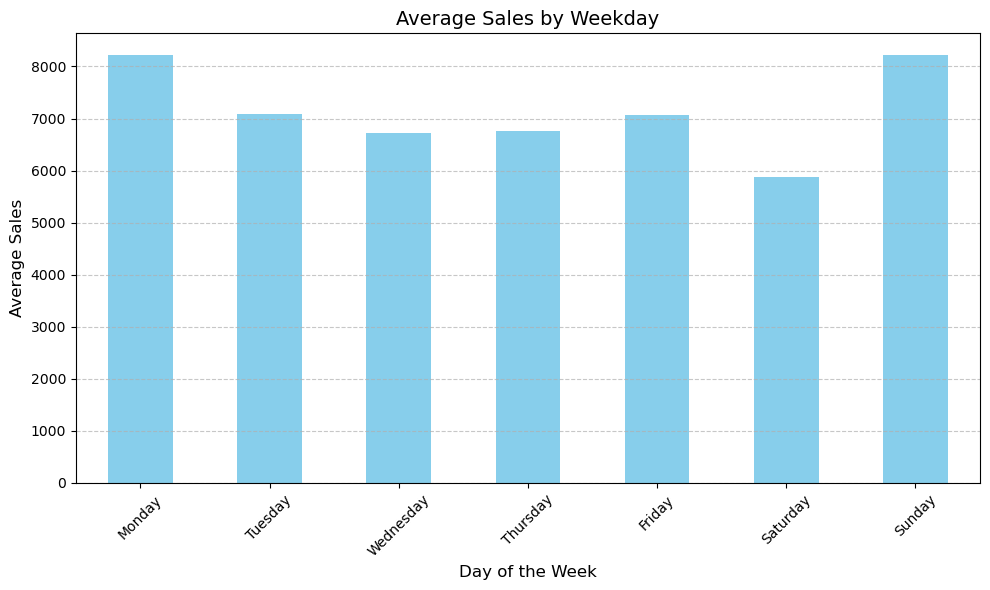

Average Sales by Weekday:
DayOfWeek
Monday       8216.252259
Tuesday      7088.409086
Wednesday    6728.786679
Thursday     6768.214973
Friday       7073.034133
Saturday     5875.084935
Sunday       8224.723908
Name: Sales, dtype: float64


In [32]:
# Plot Sales by Weakday
data['DayOfWeek'] = data['Date'].dt.day_name()
weekday_sales = data.groupby('DayOfWeek')['Sales'].mean()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Weekday', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Average Sales by Weekday:")
print(weekday_sales)

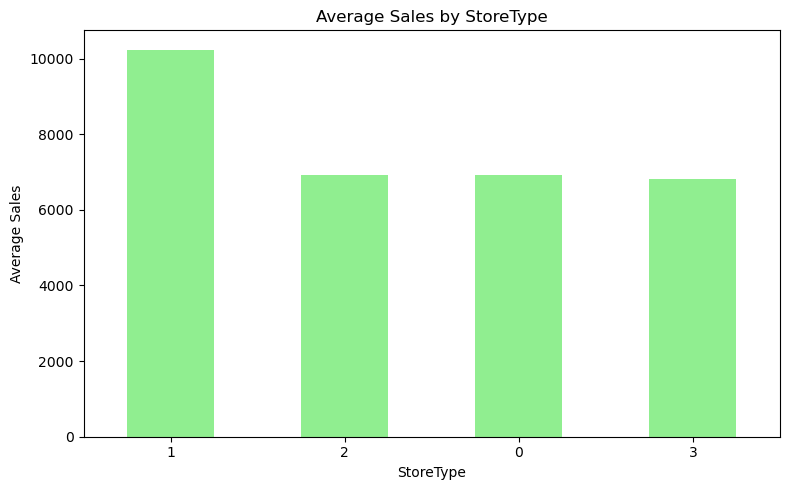

In [33]:
# Plot Sales by StoreType
plt.figure(figsize=(8, 5))
storetype_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Sales by StoreType')
plt.xlabel('StoreType')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()